# Project - Joint Mental Health Status and Cyber bullying Detection from Social Media


In [1]:
# !pip install kaggle
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)


## FOR THE REUSE OF THIS KAGGLE CODE - Uncomment the below code

In [2]:
# from kaggle_secrets import UserSecretsClient
# user_secrets = UserSecretsClient()

# import os

# os.environ['KAGGLE_USERNAME'] = user_secrets.get_secret("KAGGLE_KEY")

# os.environ['KAGGLE_KEY'] = user_secrets.get_secret("KAGGLE_KEY")

# Allowing Kaggle Downloads
import os
from google.colab import userdata

os.environ['KAGGLE_USERNAME'] = userdata.get('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')

### Twitter Depression dataset
The dataset is unlabelled (Actually it is categorized but you need to maybe add the labels if you are combining the datasets)

The data is not labelled but it is categorized into depression and non-depression datasets

In [3]:
!kaggle datasets download -d hyunkic/twitter-depression-dataset --unzip -p ./twitter_depression

Dataset URL: https://www.kaggle.com/datasets/hyunkic/twitter-depression-dataset
License(s): unknown
  0% 0.00/1.41M [00:00<?, ?B/s]
100% 1.41M/1.41M [00:00<00:00, 815MB/s]


The data imprted above is depression datasets

In [4]:
# Viewing the data
path = "./twitter_depression/"

The mental status column is empty so I added the status as depressed(labelling as discussed above). There are cleaned and uncleaned versions of the data

In [5]:
# Cleaned Twitter Depression Data
clean_dep_df = pd.read_csv(path + 'clean_non_d_tweets.csv')
clean_dep_df['status'] = 'depression'
clean_dep_df_use = clean_dep_df[['tweet', 'status']]
clean_dep_df_use.rename(columns= {'tweet': 'text'}, inplace = True)
# print(clean_dep_df_use.head(4))
print("========================================================")
print(f"Shape of clean_dep_df_use: {clean_dep_df_use.shape}")

Shape of clean_dep_df_use: (4687, 2)


In [6]:
# cp_clean_dep_df = clean_dep_df.copy
# cp_clean_dep_df['text'] = cp_clean_dep_df['text'].astype(str)
# cp_clean_dep_df['text_lenght'] = cp_clean_dep_df['text'].apply(len)
# avg_lenght = cp_clean_dep_df['text_lenght'].apply(mean)
# print(f"Average Lenght of Twitter Depression post:", {avg_lenght})

# Make a proper copy of the DataFrame (add parentheses)
cp_clean_dep_df = clean_dep_df_use.copy()

# Ensure 'text' is a string
cp_clean_dep_df['text'] = cp_clean_dep_df['text'].astype(str)

# Calculate text length (e.g., number of characters)
cp_clean_dep_df['text_length'] = cp_clean_dep_df['text'].apply(len)
cp_clean_dep_df['word_count'] = cp_clean_dep_df['text'].apply(lambda x: len(x.split()))

# Calculate the average text length (use .mean(), not apply(mean))
avg_char_length = cp_clean_dep_df['text_length'].mean()
avg_word_length = cp_clean_dep_df['word_count'].mean()

# Print the result (no need to wrap avg_length in curly braces unless using f-string variables)
print(f"Average character Length of Twitter Depression post: {avg_char_length:.2f} characters")
print(f"Average word Length of Twitter Depression post: {avg_word_length:.2f} words")


Average character Length of Twitter Depression post: 94.56 characters
Average word Length of Twitter Depression post: 18.74 words


In [7]:
# Cleaned Twitter Non-Depression Data
clean_non_d_tweets_df = pd.read_csv(path + 'clean_non_d_tweets.csv')
clean_non_d_tweets_df.head(4)
clean_non_d_tweets_df['status'] = 'not_depression'
clean_non_dep_df_use = clean_non_d_tweets_df[['tweet', 'status']]
clean_non_dep_df_use.rename(columns= {'tweet': 'text'}, inplace = True)
# print(clean_non_dep_df_use.head(4))
print("========================================================")
print(f"Shape of clean_non_dep_df_use: {clean_non_dep_df_use.shape}")

Shape of clean_non_dep_df_use: (4687, 2)


## Reddit Suicide dataset

### Dataset Description from the Kaggle Authors below - However (The V13 used here only contains suicidal and non-suicidal datasets)
The dataset is a collection of posts from the "SuicideWatch" and "depression" subreddits of the Reddit platform. The posts are collected using Pushshift API. All posts that were made to "SuicideWatch" from Dec 16, 2008(creation) till Jan 2, 2021, were collected while "depression" posts were collected from Jan 1, 2009, to Jan 2, 2021. All posts collected from SuicideWatch are labeled as suicide, While posts collected from the depression subreddit are labeled as depression. Non-suicide posts are collected from r/teenagers.

In [8]:
#!/bin/bash
!kaggle datasets download nikhileswarkomati/suicide-watch --unzip -p ./suicide-watch

Dataset URL: https://www.kaggle.com/datasets/nikhileswarkomati/suicide-watch
License(s): CC-BY-SA-4.0
  0% 0.00/60.6M [00:00<?, ?B/s]
100% 60.6M/60.6M [00:00<00:00, 1.30GB/s]


In [9]:
# Suicide Data
suicide_df = pd.read_csv("./suicide-watch/Suicide_Detection.csv")
suicide_df = suicide_df.drop(columns = ['Unnamed: 0'])
suicide_df.rename(columns = {'class': 'status'}, inplace = True)
# print(suicide_df.head(4))
print("========================================================")
print(f"Shape of suicide_df: {suicide_df.shape}")
# print(suicide_df['status'].unique())

Shape of suicide_df: (232074, 2)


In [10]:
# Checking the Categories
print(suicide_df['status'].value_counts())

status
suicide        116037
non-suicide    116037
Name: count, dtype: int64


In [11]:
# Make a proper copy of the DataFrame (add parentheses)
cp_suicide_df = suicide_df.copy()

# Ensure 'text' is a string
cp_suicide_df['text'] = cp_suicide_df['text'].astype(str)
cp_suicide_df['text_length'] = cp_suicide_df['text'].apply(len)
cp_suicide_df['word_count'] = cp_suicide_df['text'].apply(lambda x: len(x.split()))
s_avg_char_length = cp_suicide_df['text_length'].mean()
s_avg_word_length = cp_suicide_df['word_count'].mean()
print(f"Average char Length of Reddit Depression post: {s_avg_char_length:.2f} characters")
print(f"Average word Length of Reddit Depression post: {s_avg_word_length:.2f} words")


Average char Length of Reddit Depression post: 689.64 characters
Average word Length of Reddit Depression post: 131.93 words


In [12]:
# suicide_df.iloc[90]

## Cyberbullying Dataset

This dataset contains more than 47000 tweets labelled according to the class of cyberbullying:

Age;
Ethnicity;
Gender;
Religion;
Other type of cyberbullying;
Not cyberbullying

Link to Data: https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification

**Citation:** J. Wang, K. Fu, C.T. Lu, “SOSNet: A Graph Convolutional Network Approach to Fine-Grained Cyberbullying Detection,” Proceedings of the 2020 IEEE International Conference on Big Data (IEEE BigData 2020), December 10-13, 2020.

In [13]:
#!/bin/bash
!kaggle datasets download andrewmvd/cyberbullying-classification --unzip -p ./cyberbullying

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/2.82M [00:00<?, ?B/s]
100% 2.82M/2.82M [00:00<00:00, 792MB/s]


In [14]:
# Cyberbullying Datasets
cyber_df = pd.read_csv("./cyberbullying/cyberbullying_tweets.csv")
cyber_df.rename(columns = {'tweet_text': 'text', 'cyberbullying_type': 'status'}, inplace = True)
# print(cyber_df.head(4))
print("========================================================")
print(f"Shape of cyber_df: {cyber_df.shape}")
# print(cyber_df['status'].unique())

Shape of cyber_df: (47692, 2)


In [15]:
# len(cyber_df)
print(cyber_df["status"].value_counts())

status
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64


## Twitter Suicidal Detection Dataset
**Description (by Authors):** This dataset provides a collection of tweets along with an annotation indicating whether each tweet is related to suicide or not. The primary objective of this dataset is to facilitate the development and evaluation of machine learning models for the classification of tweets as either expressing suicidal sentiments or not. This dataset has been internally generated by our team members specifically for our NLP project.

**Link:** https://www.kaggle.com/datasets/aunanya875/suicidal-tweet-detection-dataset

In [16]:
#!/bin/bash
!kaggle datasets download aunanya875/suicidal-tweet-detection-dataset --unzip -p ./suicidal_tweet

Dataset URL: https://www.kaggle.com/datasets/aunanya875/suicidal-tweet-detection-dataset
License(s): CC-BY-NC-SA-4.0
  0% 0.00/88.3k [00:00<?, ?B/s]
100% 88.3k/88.3k [00:00<00:00, 363MB/s]


In [17]:
# Twitter Suicide Data
suicide_tweet_df = pd.read_csv("./suicidal_tweet/Suicide_Ideation_Dataset(Twitter-based).csv")
suicide_tweet_df.rename(columns = {'Tweet': 'text', 'Suicide': 'status'}, inplace = True)
# print(suicide_tweet_df.head(4))
print("========================================================")
print(f"Shape of suicide_tweet_df: {suicide_tweet_df.shape}")
# print(suicide_tweet_df['status'].unique())
# print(suicide_tweet_df['status'].value_counts())

Shape of suicide_tweet_df: (1787, 2)


In [18]:
len(suicide_tweet_df)
print(suicide_tweet_df["status"].value_counts())

status
Not Suicide post           1127
Potential Suicide post      660
Name: count, dtype: int64


The twitter suicide data looks too small and too imbalanced - We will likely drop it as we have a larger Reddit version.

## Twitter Mental Health Dataset

Dataset Description by Authors: The data is in uncleaned format and is collected using Twitter API. The Tweets has been filtered to keep only the English context. It targets mental health classification of the user at Tweet-level. Also check out notebooks I have provided which demonstrates Data Cleaning and Feature Extraction Techniques on the given dataset

* Topic Modelling Features using LDA (Latent Dirichlet Allocation) i.e. summarizing tweet into one of Top k topics
* Emoji Sentiment Features i.e. count of Positive, Negative and Neutral Expression emoji's present in the tweet

**Link:** https://www.kaggle.com/datasets/infamouscoder/mental-health-social-media

In [19]:
#!/bin/bash
!kaggle datasets download infamouscoder/mental-health-social-media --unzip -p ./twitter_mentalhealth

Dataset URL: https://www.kaggle.com/datasets/infamouscoder/mental-health-social-media
License(s): CC0-1.0
  0% 0.00/1.10M [00:00<?, ?B/s]
100% 1.10M/1.10M [00:00<00:00, 720MB/s]


In [20]:
twitter_mental_df = pd.read_csv("./twitter_mentalhealth/Mental-Health-Twitter.csv")

# twitter_mental_df.head(4)

# Dataset sourcing not well-defined - Will not be used

## Sentiment Analysis for Mental Health Dataset

**Description:** This comprehensive dataset is a meticulously curated collection of mental health statuses tagged from various statements. The dataset amalgamates raw data from multiple sources, cleaned and compiled to create a robust resource for developing chatbots and performing sentiment analysis.

**Link:** https://www.kaggle.com/datasets/suchintikasarkar/sentiment-analysis-for-mental-health

In [21]:
#!/bin/bash
!kaggle datasets download suchintikasarkar/sentiment-analysis-for-mental-health --unzip -p ./anxiety

Dataset URL: https://www.kaggle.com/datasets/suchintikasarkar/sentiment-analysis-for-mental-health
License(s): DbCL-1.0
  0% 0.00/11.1M [00:00<?, ?B/s]
100% 11.1M/11.1M [00:00<00:00, 1.20GB/s]


In [22]:
multi_mental_df = pd.read_csv("./anxiety/Combined Data.csv")
multi_mental_df.drop(columns = ['Unnamed: 0'], inplace = True)
multi_mental_df.rename(columns={'statement':'text'})
# print(multi_mental_df.head(4))
print("========================================================")
print(f"Shape of multi_mental_df: {multi_mental_df.shape}")
# print(multi_mental_df['status'].unique())
# print(multi_mental_df['status'].value_counts())

Shape of multi_mental_df: (53043, 2)


In [23]:
# multi_mental_df['status'].value_counts()

In [24]:
# len(multi_mental_df)

In [25]:
multi_mental_df.groupby('status').count()

,statement
status,
Anxiety,3841
Bipolar,2777
Depression,15404
Normal,16343
Personality disorder,1077
Stress,2587
Suicidal,10652


# **NOTES AND IDEAS**
- Train on a different dataset, predict a different dataset and measure performace
- Do research aand combine datasets with different features, select train and test data carefully
- Research about best algorithms that could help, check instances of where such works has been done
- Where does LLM come in. Do we train traditional models and create LLM model too and measure performance
- How does LLM help with explanability
- **Goal:** A large model that can do many predictions accurately

# Random Selection - Downsampling Large Datasets

This function was written to easily randomly select a specified n number of samples from large datasets

In [26]:
def random_select(df, n, seed=42):
    """
    Selects `n` random rows from a DataFrame.
    If `n` is greater than the available rows, it randomizes and returns all rows.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        n (int): Number of rows to randomly select.
        seed (int, optional): Random seed for reproducibility. Default is 42.

    Returns:
        pd.DataFrame: A DataFrame with `n` randomly selected rows or a shuffled DataFrame if `n` > len(df).
    """

    # Check if DataFrame is None
    if df is None:
        print("Warning: DataFrame is None. Cannot select rows.")
        return None

    # Get DataFrame length
    df_len = len(df)

    # If n is greater than available rows, shuffle the entire dataset
    if n > df_len:
        print(f"Requested {n} rows - but only {df_len} available. Returning all rows, shuffled.")
        return df.sample(frac=1, random_state=seed).reset_index(drop=True)

    # Select `n` random rows
    return df.sample(n=n, random_state=seed).reset_index(drop=True)



suicide_tweet_df = random_select(suicide_tweet_df, 5000)
suicide_tweet_df.head()


Requested 5000 rows - but only 1787 available. Returning all rows, shuffled.


,text,status
0,Last few hour in England...,Not Suicide post
1,Showcase Quick @ VIP room on Thursday,Not Suicide post
2,"@candyguy53,Tillsonburg, Ontario,@amvetsupport...",Potential Suicide post
3,@Chels_V morning,Not Suicide post
4,@elliottcable I prefer @poopdiary meself.,Not Suicide post


## Data Cleaning

The function below is used for cleaning the Datasets

In [27]:
def clean_and_modify_texts(df, text_col='text', status_col='status'):
    """
    Cleans text data and modifies status text formatting in the specified columns of a DataFrame.
    Also drops rows where text_col or status_col is empty after processing.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        text_col (str, optional): The column to clean by removing links, mentions, hashtags, and numbers.
        status_col (str, optional): The column to modify by replacing spaces with underscores.

    Returns:
        pd.DataFrame: A DataFrame with cleaned text and modified status, with empty rows removed.
    """

    # Check if DataFrame is None
    if df is None:
        print("Warning: DataFrame is None. Cleaning cannot be performed.")
        return None

    df = df.copy()

    # Clean text column if specified
    if text_col and text_col in df.columns:
        df[text_col] = df[text_col].fillna('').str.replace(
            r'http\S+|www\S+|@\S+|#\S+|[^a-zA-Z0-9\s]|RT\s+|\d+', '', regex=True
        ).str.replace(r'\s+', ' ', regex=True).str.strip().str.lower()
    elif text_col:
        print(f"Warning: Column '{text_col}' does not exist in the DataFrame.")

    # Modify status column if specified
    if status_col and status_col in df.columns:
        df[status_col] = df[status_col].fillna('').str.lower().str.strip().replace(
            r'\s+', '_', regex=True
        ).str.rstrip('_')  # Ensures no trailing underscores
    elif status_col:
        print(f"Warning: Column '{status_col}' does not exist in the DataFrame.")

    # Drop rows where either column is empty after processing
    if text_col and status_col:
        df = df[(df[text_col] != '') & (df[status_col] != '')]
    elif text_col:
        df = df[df[text_col] != '']
    elif status_col:
        df = df[df[status_col] != '']

    return df



mini_suicide_df = random_select(suicide_tweet_df, 5000)
mini_suicide_df = clean_and_modify_texts(mini_suicide_df)
mini_suicide_df.head()

Requested 5000 rows - but only 1787 available. Returning all rows, shuffled.


,text,status
0,my whole family is so damn beautiful and im th...,potential_suicide_post
1,yea they just keep getting better,not_suicide_post
2,happy birthday eat something good,not_suicide_post
3,ha ha i started something with the rocquestar ...,not_suicide_post
4,bom dia twitters,not_suicide_post


## Divide and Save
The funtion below is written to break down the datasets with multiple categories and save them to separate csv files

In [28]:
def divide_and_save(df, parent_name="df", status_col='status', output_dir="./"):
    """
    Divides a DataFrame into multiple DataFrames based on unique values in a specified column,
    saves them as CSV files, and prints out the saved file names.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        parent_name (str): Name of the original DataFrame (used for naming new DataFrames).
        status_col (str): The column to divide the DataFrame by (default is 'status').
        output_dir (str): Directory where CSV files will be saved (default is current directory).

    Returns:
        dict: A dictionary where keys are dynamically generated DataFrame names,
              and values are corresponding DataFrames.
    """

    # Check if DataFrame is None
    if df is None:
        print("Warning: DataFrame is None. Cannot divide.")
        return None

    # Check if status_col exists
    if status_col not in df.columns:
        print(f"Warning: Column '{status_col}' does not exist in the DataFrame.")
        return None

    # Dictionary to store split DataFrames with dynamically generated names
    status_groups = {}

    # Iterate through unique values and create separate DataFrames with dynamic names
    for status_value in df[status_col].dropna().unique():
        clean_status = str(status_value).replace(" ", "_").lower()  # Clean status name
        new_df_name = f"{parent_name}_{clean_status}"  # Example: df_urgent, df_normal

        # Create DataFrame for this category
        status_groups[new_df_name] = df[df[status_col] == status_value].reset_index(drop=True)

        # Define file path and save as CSV
        file_path = f"{output_dir}{new_df_name}.csv"
        status_groups[new_df_name].to_csv(file_path, index=False)

        # Print confirmation
        print(f"Saved: {file_path}")

    return status_groups


multi_mental_dfs = divide_and_save(multi_mental_df, parent_name="mental", status_col='status')


Saved: ./mental_anxiety.csv
Saved: ./mental_normal.csv
Saved: ./mental_depression.csv
Saved: ./mental_suicidal.csv
Saved: ./mental_stress.csv
Saved: ./mental_bipolar.csv
Saved: ./mental_personality_disorder.csv


## Creating Dataframes from the broken Datasets

In [29]:
from os import rename
# from os import rename
dep_df2 = pd.read_csv("./mental_depression.csv")
dep_df2.rename(columns = {'statement': 'text'}, inplace = True)
# print(dep_df2.head(4))
print("========================================================")
print(f"Shape of dep_df2: {dep_df2.shape}")

normal_df = pd.read_csv("./mental_normal.csv")
normal_df.rename(columns = {'statement': 'text'}, inplace = True)
# print(normal_df.head(4))
print("========================================================")
print(f"Shape of normal_df: {normal_df.shape}")

anxiety_df = pd.read_csv("./mental_anxiety.csv")
anxiety_df.rename(columns = {'statement': 'text'}, inplace = True)
# print(anxiety_df.head(4))
print("========================================================")
print(f"Shape of anxiety_df: {anxiety_df.shape}")

suicide_df3 = pd.read_csv("./mental_suicidal.csv")
suicide_df3.rename(columns = {'statement': 'text'}, inplace = True)
# print(suicide_df3.head(4))
print("========================================================")
print(f"Shape of suicide_df3: {suicide_df3.shape}")


stress_df = pd.read_csv("./mental_stress.csv")
stress_df.rename(columns = {'statement': 'text'}, inplace = True)
# print(stress_df.head(4))
print("========================================================")
print(f"Shape of stress_df: {stress_df.shape}")

bipolar_df = pd.read_csv("./mental_bipolar.csv")
bipolar_df.rename(columns = {'statement': 'text'}, inplace = True)
# print(bipolar_df.head(4))
print("========================================================")
print(f"Shape of bipolar_df: {bipolar_df.shape}")

personality_disorder_df = pd.read_csv("./mental_personality_disorder.csv")
personality_disorder_df.rename(columns = {'statement': 'text'}, inplace = True)
# print(personality_disorder_df.head(4))
print("========================================================")
print(f"Shape of personality_disorder_df: {personality_disorder_df.shape}")

Shape of dep_df2: (15404, 2)
Shape of normal_df: (16351, 2)
Shape of anxiety_df: (3888, 2)
Shape of suicide_df3: (10653, 2)
Shape of stress_df: (2669, 2)
Shape of bipolar_df: (2877, 2)
Shape of personality_disorder_df: (1201, 2)


In [30]:
# Breaking down Twitter Suicide Datasets
suicide_tweets_dfs = divide_and_save(suicide_tweet_df, parent_name="suicide", status_col='status')


Saved: ./suicide_not_suicide_post.csv
Saved: ./suicide_potential_suicide_post_.csv


In [31]:
suicide_df2 = pd.read_csv("./suicide_potential_suicide_post_.csv")
suicide_df2.rename(columns = {'text': 'text'}, inplace = True)
suicide_df2['status'] = 'suicide'
# print(suicide_df2.head(4))
print("========================================================")
print(f"Shape of suicide_df2: {suicide_df2.shape}")

not_suicide_df2 = pd.read_csv("./suicide_not_suicide_post.csv")
not_suicide_df2.rename(columns = {'text': 'text'}, inplace = True)
not_suicide_df2['status'] = 'non_suicide'
# print(not_suicide_df2.head(4))
print("========================================================")
print(f"Shape of not_suicide_df2: {not_suicide_df2.shape}")

Shape of suicide_df2: (660, 2)
Shape of not_suicide_df2: (1127, 2)


In [32]:
cyber_dfs = divide_and_save(cyber_df)

Saved: ./df_not_cyberbullying.csv
Saved: ./df_gender.csv
Saved: ./df_religion.csv
Saved: ./df_other_cyberbullying.csv
Saved: ./df_age.csv
Saved: ./df_ethnicity.csv


In [33]:
not_cyberbullying_df = pd.read_csv("./df_not_cyberbullying.csv")
not_cyberbullying_df['status'] = 'not_cb'
# print(not_cyberbullying_df.head(4))
print("========================================================")
print(f"Shape of not_cyberbullying_df: {not_cyberbullying_df.shape}")

cyber_gender_df = pd.read_csv("./df_gender.csv")
cyber_gender_df['status'] = 'gender_cb'
# print(cyber_gender_df.head(4))
print("========================================================")
print(f"Shape of cyber_gender_df: {cyber_gender_df.shape}")

cyber_religion_df = pd.read_csv("./df_religion.csv")
cyber_religion_df['status'] = 'religion_cb'
# print(cyber_religion_df.head(4))
print("========================================================")
print(f"Shape of cyber_religion_df: {cyber_religion_df.shape}")

cyber_ethnicity_df = pd.read_csv("./df_ethnicity.csv")
cyber_ethnicity_df['status'] = 'ethnicity_cb'
# print(cyber_ethnicity_df.head(4))
print("========================================================")
print(f"Shape of cyber_ethnicity_df: {cyber_ethnicity_df.shape}")

cyber_age_df = pd.read_csv("./df_age.csv")
cyber_age_df['status'] = 'age_cb'
# print(cyber_age_df.head(4))
print("========================================================")
print(f"Shape of cyber_age_df: {cyber_age_df.shape}")

cyber_other_cyberbullying_df = pd.read_csv("./df_other_cyberbullying.csv")
cyber_other_cyberbullying_df['status'] = 'other_cb'
# print(cyber_other_cyberbullying_df.head(4))
print("========================================================")
print(f"Shape of cyber_other_cyberbullying_df: {cyber_other_cyberbullying_df.shape}")

Shape of not_cyberbullying_df: (7945, 2)
Shape of cyber_gender_df: (7973, 2)
Shape of cyber_religion_df: (7998, 2)
Shape of cyber_ethnicity_df: (7961, 2)
Shape of cyber_age_df: (7992, 2)
Shape of cyber_other_cyberbullying_df: (7823, 2)


In [34]:
dep_df1 = clean_dep_df_use
non_dep_df1 = clean_non_dep_df_use

In [35]:
suicide_df = pd.read_csv("./suicide-watch/Suicide_Detection.csv")
suicide_df = suicide_df.drop(columns = ['Unnamed: 0'])
suicide_df.rename(columns = {'class': 'status'}, inplace = True)
# print(suicide_df.head(4))
print("========================================================")
print(f"Shape of suicide_df: {suicide_df.shape}")
print(suicide_df['status'].unique())

Shape of suicide_df: (232074, 2)
['suicide' 'non-suicide']


In [36]:
suicide1_dfs = divide_and_save(suicide_df, parent_name="suicide", status_col='status')

Saved: ./suicide_suicide.csv
Saved: ./suicide_non-suicide.csv


In [37]:
suicide_df1 = pd.read_csv("./suicide_suicide.csv")
suicide_df1.rename(columns = {'text': 'text'}, inplace = True)
suicide_df1['status'] = 'suicide'
# print(suicide_df1.head(4))
print("========================================================")
print(f"Shape of suicide_df1: {suicide_df1.shape}")


not_suicide_df1 = pd.read_csv("./suicide_non-suicide.csv")
not_suicide_df1.rename(columns = {'text': 'text'}, inplace = True)
not_suicide_df1['status'] = 'non_suicide'
# print(not_suicide_df1.head(4))
print("========================================================")
print(f"Shape of non_suicide_df1: {not_suicide_df1.shape}")

Shape of suicide_df1: (116037, 2)
Shape of non_suicide_df1: (116037, 2)


### **Dataset Selection:** Identifying and selecting datasets to combine for this project

In [38]:
# This is all the datasets (19) that was loaded and examined above
all_datasets = [dep_df1, non_dep_df1, dep_df2, normal_df, anxiety_df, stress_df, bipolar_df, personality_disorder_df, suicide_df1, not_suicide_df1, suicide_df2, not_suicide_df2, suicide_df3, not_cyberbullying_df, cyber_gender_df, cyber_religion_df, cyber_ethnicity_df, cyber_age_df, cyber_other_cyberbullying_df]

list_of_datasets = [
    "dep_df1", "non_dep_df1", "dep_df2", "normal_df", "anxiety_df", "stress_df",
    "bipolar_df", "personality_disorder_df", "suicide_df1", "not_suicide_df1",
    "suicide_df2", "not_suicide_df2", "suicide_df3", "not_cyberbullying_df",
    "cyber_gender_df", "cyber_religion_df", "cyber_ethnicity_df",
    "cyber_age_df", "cyber_other_cyberbullying_df"
]

# Reduced number of Datasets (13)
filtered_datasets_names = [
    "dep_df1", "non_dep_df1", "anxiety_df", "stress_df",
    "bipolar_df", "personality_disorder_df", "suicide_df1", "not_suicide_df1",
    "cyber_gender_df", "cyber_religion_df", "cyber_ethnicity_df",
    "cyber_age_df", "cyber_other_cyberbullying_df"
]

filtered_datasets = [
    dep_df1, non_dep_df1, anxiety_df, stress_df,
    bipolar_df, personality_disorder_df, suicide_df1, not_suicide_df1,
    cyber_gender_df, cyber_religion_df, cyber_ethnicity_df,
    cyber_age_df, cyber_other_cyberbullying_df
]

# More reduced Datasets (10)
ten_datasets = [anxiety_df, stress_df, bipolar_df, personality_disorder_df, suicide_df1, not_suicide_df1, cyber_gender_df, cyber_religion_df, cyber_ethnicity_df, cyber_age_df]

list_of_ten_datasets = [
    "anxiety_df", "stress_df",
    "bipolar_df", "personality_disorder_df", "suicide_df1", "not_suicide_df1",
    "cyber_gender_df", "cyber_religion_df", "cyber_ethnicity_df",
    "cyber_age_df"
]


# print(list_of_datasets)



# Print the filtered dataset names to verify
print(list_of_ten_datasets)
# print(filtered_datasets)


['anxiety_df', 'stress_df', 'bipolar_df', 'personality_disorder_df', 'suicide_df1', 'not_suicide_df1', 'cyber_gender_df', 'cyber_religion_df', 'cyber_ethnicity_df', 'cyber_age_df']


### Cleaning all the data using the previously defined function

In [39]:
import time
num_datasets = len(ten_datasets)
# print(f"Number of datasets: {num_datasets}")
start_time = time.time()
for dataset in ten_datasets:
    dataset = clean_and_modify_texts(dataset)

stop_time = time.time()
execution_time = stop_time - start_time
print(f"Time taken to clean all the {num_datasets} datasets: {execution_time} seconds")

Time taken to clean all the 10 datasets: 21.52175498008728 seconds


## Selecting 1000 random rows from the datasets
### Testing the random_select function

The cell below shows how the random\_select() function works. If it doesn't have enough, it just randomizes the dataset, if it has enough rows it does a randown selection of the requested $n$ rows

In [40]:
start_time = time.time()
for dataset in ten_datasets:
    dataset = random_select(dataset, 1000)

stop_time = time.time()
execution_time = stop_time - start_time
print(f"Time taken to select 1000 random rows from all the {num_datasets} datasets: {execution_time} seconds")

Time taken to select 1000 random rows from all the 10 datasets: 0.013173341751098633 seconds


In [41]:
# for dataset, name in zip(all_datasets, list_of_datasets):
#     print(f"Length of {name} dataset: {len(dataset)}")

### Data Cleaning

All the datasets have been arranged in a way that they can be iterated on, yet, they can also be selected individually <p>
The cell below show what happens when the two functions are called

In [42]:
for i, (dataset, name) in enumerate(zip(ten_datasets, list_of_ten_datasets)):
    ten_datasets[i] = clean_and_modify_texts(dataset)
    ten_datasets[i] = random_select(ten_datasets[i], 3000)
    # print(f"Length of {name} dataset: {len(all_datasets[i])}")

print("========================================================")
print('After the iteration')
print("========================================================")

# Now the updated values will be printed
for dataset, name in zip(ten_datasets, list_of_ten_datasets):
    print(f"Length of {name} dataset: {len(dataset)}")


Requested 3000 rows - but only 2585 available. Returning all rows, shuffled.
Requested 3000 rows - but only 2777 available. Returning all rows, shuffled.
Requested 3000 rows - but only 1077 available. Returning all rows, shuffled.
After the iteration
Length of anxiety_df dataset: 3000
Length of stress_df dataset: 2585
Length of bipolar_df dataset: 2777
Length of personality_disorder_df dataset: 1077
Length of suicide_df1 dataset: 3000
Length of not_suicide_df1 dataset: 3000
Length of cyber_gender_df dataset: 3000
Length of cyber_religion_df dataset: 3000
Length of cyber_ethnicity_df dataset: 3000
Length of cyber_age_df dataset: 3000


# Data Augmentation using EDA - Oversampling

To address the significant class imbalance in our dataset, we will oversample the minority classes to a target of 3000 samples each. Instead of simply duplicating data, which can lead to overfitting, we will employ Easy Data Augmentation (EDA) techniques to generate new, synthetic text samples.

*This approach involves applying one of four random transformations to the original text:*

**Synonym Replacement (SR):** Replaces some non-stop words with their synonyms.

**Random Insertion (RI):** Inserts synonyms of random words at random positions.

**Random Swap (RS):** Swaps the positions of two random words in the sentence.

**Random Deletion (RD):** Randomly removes words with a certain probability.

We will apply this process to the stress, bipolar, and personality_disorder datasets until they each reach the target size, creating a more balanced dataset for training our models.

**Paper:** EDA: Easy Data Augmentation Techniques for Boosting Performance on Text Classification Tasks(https://aclanthology.org/D19-1670/)

In [43]:
import pandas as pd
import math
import random
import re
from random import shuffle
import nltk
import os
import zipfile
import urllib.request

# --- 1. Foolproof NLTK Setup ---
# This block manually creates a local folder, downloads the necessary files,
# and forces NLTK to use them. This bypasses all environment issues.

def setup_nltk_locally():
    """Manually downloads and sets up NLTK packages in a local directory."""
    # Create a local directory for NLTK data
    local_nltk_dir = os.path.join(os.getcwd(), 'nltk_data')
    if not os.path.exists(local_nltk_dir):
        os.makedirs(local_nltk_dir)

    # Add this local directory to NLTK's search path
    if local_nltk_dir not in nltk.data.path:
        nltk.data.path.insert(0, local_nltk_dir)

    # Define packages and their download URLs
    packages = {
        'wordnet': ('corpora', 'https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/wordnet.zip'),
        'punkt': ('tokenizers', 'https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/tokenizers/punkt.zip'),
        'stopwords': ('corpora', 'https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/stopwords.zip')
    }

    # Download and unzip each package if it's not already there
    for name, (pkg_type, url) in packages.items():
        pkg_path = os.path.join(local_nltk_dir, pkg_type, name)
        if not os.path.exists(pkg_path):
            print(f"'{name}' not found. Manually downloading...")
            zip_path = os.path.join(local_nltk_dir, f"{name}.zip")
            pkg_dir = os.path.join(local_nltk_dir, pkg_type)
            os.makedirs(pkg_dir, exist_ok=True)

            urllib.request.urlretrieve(url, zip_path)
            with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                zip_ref.extractall(pkg_dir)
            os.remove(zip_path)
            print(f"'{name}' installed successfully. ✅")

# Run the setup
setup_nltk_locally()
from nltk.corpus import wordnet, stopwords

# --- 2. Your EDA Functions (with corrections) ---

random.seed(42) # for reproducibility
stop_words = stopwords.words('english')

def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for l in syn.lemmas():
            synonym = l.name().replace("_", " ").replace("-", " ").lower()
            synonym = "".join([char for char in synonym if char in ' qwertyuiopasdfghjklzxcvbnm'])
            synonyms.add(synonym)
    if word in synonyms:
        synonyms.remove(word)
    return list(synonyms)

def synonym_replacement(words_str, n):
    words = str(words_str).split()
    new_words = words.copy()
    random_word_list = list(set([word for word in words if word not in stop_words]))
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        if synonyms:
            synonym = random.choice(synonyms)
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:
            break
    return ' '.join(new_words)

def random_deletion(words_str, p):
    words = str(words_str).split()
    if len(words) == 1: return words_str
    new_words = [word for word in words if random.uniform(0, 1) > p]
    return ' '.join(new_words) if new_words else random.choice(words)

def random_swap(words_str, n):
    words = str(words_str).split()
    new_words = words.copy()
    for _ in range(n):
        if len(new_words) < 2: continue
        idx1, idx2 = random.sample(range(len(new_words)), 2)
        new_words[idx1], new_words[idx2] = new_words[idx2], new_words[idx1]
    return ' '.join(new_words)

def random_insertion(words_str, n):
    words = str(words_str).split()
    new_words = words.copy()
    for _ in range(n):
        synonyms = []
        counter = 0
        while not synonyms:
            if not new_words or counter >= 10: return ' '.join(new_words)
            random_word = random.choice(new_words)
            synonyms = get_synonyms(random_word)
            counter += 1
        random_synonym = random.choice(synonyms)
        new_words.insert(random.randint(0, len(new_words)), random_synonym)
    return ' '.join(new_words)

def augment_sentence(sentence, n=1, p=0.1):
    augmentation_functions = [
        lambda s: synonym_replacement(s, n),
        lambda s: random_deletion(s, p),
        lambda s: random_swap(s, n),
        lambda s: random_insertion(s, n)
    ]
    chosen_function = random.choice(augmentation_functions)
    return chosen_function(sentence)

# --- 3. Main Augmentation Function ---
def augment_to_target(df, target_n, text_col='text', label_col='status'):
    current_n = len(df)
    needed = target_n - current_n
    if needed <= 0: return df
    print(f"'{df[label_col].iloc[0]}': Current: {current_n}, Target: {target_n}, Needing: {needed}.")

    augmented_texts = []
    while len(augmented_texts) < needed:
        random_row = df.sample(n=1).iloc[0]
        original_text = str(random_row[text_col])
        if not original_text.strip(): continue
        augmented_sentence = augment_sentence(original_text)
        augmented_texts.append({text_col: augmented_sentence, label_col: random_row[label_col]})

    augmented_df = pd.DataFrame(augmented_texts)
    return pd.concat([df, augmented_df], ignore_index=True)

dataset_name_to_index = {
    "stress_df": 1,
    "bipolar_df": 2,
    "personality_disorder_df": 3
}

print("Master list 'ten_datasets' and 'dataset_name_to_index' mapping have been created.")

# --- 4. Apply Augmentation to Your Datasets ---
TARGET_SIZE = 3000

print("\n--- Processing stress_df ---")
stress_df_balanced = augment_to_target(stress_df, TARGET_SIZE)
print(f"Final length of stress_df: {len(stress_df_balanced)}")

print("\n--- Processing bipolar_df ---")
bipolar_df_balanced = augment_to_target(bipolar_df, TARGET_SIZE)
print(f"Final length of bipolar_df: {len(bipolar_df_balanced)}")

print("\n--- Processing personality_disorder_df ---")
personality_disorder_balanced = augment_to_target(personality_disorder_df, TARGET_SIZE)
print(f"Final length of personality_disorder_df: {len(personality_disorder_balanced)}")

# --- 5. Update Master List ---
print("\nUpdating master dataset list...")
ten_datasets[dataset_name_to_index["stress_df"]] = stress_df_balanced
ten_datasets[dataset_name_to_index["bipolar_df"]] = bipolar_df_balanced
ten_datasets[dataset_name_to_index["personality_disorder_df"]] = personality_disorder_balanced
print("Datasets updated successfully! ")

'wordnet' not found. Manually downloading...
'wordnet' installed successfully. ✅
'punkt' not found. Manually downloading...
'punkt' installed successfully. ✅
'stopwords' not found. Manually downloading...
'stopwords' installed successfully. ✅
Master list 'ten_datasets' and 'dataset_name_to_index' mapping have been created.

--- Processing stress_df ---
'Stress': Current: 2669, Target: 3000, Needing: 331.
Final length of stress_df: 3000

--- Processing bipolar_df ---
'Bipolar': Current: 2877, Target: 3000, Needing: 123.
Final length of bipolar_df: 3000

--- Processing personality_disorder_df ---
'Personality disorder': Current: 1201, Target: 3000, Needing: 1799.
Final length of personality_disorder_df: 3000

Updating master dataset list...
Datasets updated successfully! 


# Data Understanding

## TF-IDF and Keyword Extraction

**Purpose:** Identify distinctive terms beyond raw frequency (like word clouds) to confirm dataset uniqueness and relevance.

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from tabulate import tabulate

# Readable names
name_map = {
    'anxiety_df': 'Anxiety',
    'stress_df': 'Stress',
    'bipolar_df': 'Bipolar',
    'personality_disorder_df': 'Personality Disorder',
    'suicide_df1': 'Suicide',
    'not_suicide_df1': 'Non-Suicide',
    'not_cyberbullying_df': 'Not Cyberbullying',
    'cyber_gender_df': 'Gender Cyberbullying',
    'cyber_religion_df': 'Religion Cyberbullying',
    'cyber_ethnicity_df': 'Ethnicity Cyberbullying',
    'cyber_age_df': 'Age Cyberbullying',
    'cyber_other_cyberbullying_df': 'Other Cyberbullying'
}

tfidf_rows = []
natural_rows = []

for dataset, name in zip(ten_datasets, list_of_ten_datasets):
    texts = dataset['text'].astype(str)

    # --- TF-IDF terms ---
    tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
    matrix = tfidf.fit_transform(texts)
    feature_names = tfidf.get_feature_names_out()
    scores = matrix.mean(axis=0).A1
    top_tfidf = [term for term, _ in sorted(zip(feature_names, scores), key=lambda x: x[1], reverse=True)[:10]]

    # --- Natural terms ---
    all_words = " ".join(texts).lower().split()
    most_common = [word for word, _ in Counter(all_words).most_common(10)]

    tfidf_rows.append([name_map[name]] + top_tfidf)
    natural_rows.append([name_map[name]] + most_common)

# --- Format DataFrames ---
columns = ['Dataset'] + [str(i) for i in range(1, 11)]

df_tfidf = pd.DataFrame(tfidf_rows, columns=columns).set_index('Dataset')
df_natural = pd.DataFrame(natural_rows, columns=columns).set_index('Dataset')

# Optional: Display or export
print("TF-IDF Top Words Table:\n")
print(tabulate(df_tfidf, headers = 'keys', tablefmt = 'fancy_grid'))

print("\nMost Frequent Natural Words Table:\n")
print(tabulate(df_natural, headers='keys', tablefmt='fancy_grid'))

TF-IDF Top Words Table:

╒═════════════════════════╤═════════╤═════════╤═════════╤═══════════╤══════════╤════════╤═════════╤════════╤════════╤════════╕
│ Dataset                 │ 1       │ 2       │ 3       │ 4         │ 5        │ 6      │ 7       │ 8      │ 9      │ 10     │
╞═════════════════════════╪═════════╪═════════╪═════════╪═══════════╪══════════╪════════╪═════════╪════════╪════════╪════════╡
│ Anxiety                 │ im      │ anxiety │ like    │ just      │ restless │ ive    │ feel    │ dont   │ know   │ really │
├─────────────────────────┼─────────┼─────────┼─────────┼───────────┼──────────┼────────┼─────────┼────────┼────────┼────────┤
│ Stress                  │ stress  │ just    │ like    │ feel      │ don      │ ve     │ know    │ nan    │ time   │ work   │
├─────────────────────────┼─────────┼─────────┼─────────┼───────────┼──────────┼────────┼─────────┼────────┼────────┼────────┤
│ Bipolar                 │ just    │ like    │ feel    │ ve        │ bipolar  │ don  

## Post lenght Analysis for the Datasets after cleaning

In [45]:
df_counts = []

for dataset, dataset_name in zip(ten_datasets, list_of_ten_datasets):
    cp_df = dataset.copy()
    cp_df['text'] = cp_df['text'].astype(str)
    cp_df['text_length'] = cp_df['text'].apply(len)
    cp_df['word_count'] = cp_df['text'].apply(lambda x: len(x.split()))
    avg_char_length = cp_df['text_length'].mean()
    avg_word_length = cp_df['word_count'].mean()
    df_counts.append({
        'Dataset': name_map[dataset_name],
        'Post Length (Characters)': round(avg_char_length, 2),
        'Post Length (Words)': round(avg_word_length, 2)
    })
    # print(f"Average char Length of {name_map[dataset_name]} post: {avg_char_length:.2f} characters")
    # print(f"Average word Length of {name_map[dataset_name]} post: {avg_word_length:.2f} words")
    # print(f"==========================================================================")


In [46]:
counts_df = pd.DataFrame(df_counts)
print(tabulate(counts_df, headers="keys", tablefmt="fancy_grid"))

╒════╤═════════════════════════╤════════════════════════════╤═══════════════════════╕
│    │ Dataset                 │   Post Length (Characters) │   Post Length (Words) │
╞════╪═════════════════════════╪════════════════════════════╪═══════════════════════╡
│  0 │ Anxiety                 │                     714.96 │                138.71 │
├────┼─────────────────────────┼────────────────────────────┼───────────────────────┤
│  1 │ Stress                  │                     596.93 │                111.59 │
├────┼─────────────────────────┼────────────────────────────┼───────────────────────┤
│  2 │ Bipolar                 │                     914.5  │                170.43 │
├────┼─────────────────────────┼────────────────────────────┼───────────────────────┤
│  3 │ Personality Disorder    │                     870.32 │                163.8  │
├────┼─────────────────────────┼────────────────────────────┼───────────────────────┤
│  4 │ Suicide                 │                    10

# Word Count Analysis

In [47]:
from textblob import TextBlob
from nltk.tokenize import sent_tokenize
import nltk
from tabulate import tabulate

# Download NLTK data for sentence tokenization (run once if not already downloaded)
nltk.download('punkt')

# Initialize lists for word stats
word_dataset_names = []
word_min = []
word_avg = []
word_max = []

# Loop through datasets
for dataset, name in zip(ten_datasets, list_of_ten_datasets):
    # Compute word counts per post
    word_counts = dataset['text'].astype(str).apply(lambda x: len(x.split()))

    # Collect word stats
    word_dataset_names.append(name)
    word_min.append(word_counts.min())
    word_avg.append(word_counts.mean())
    word_max.append(word_counts.max())

# Create DataFrame for word stats
word_stats_df = pd.DataFrame({
    'dataset_name': word_dataset_names,
    'min_words': word_min,
    'avg_words': word_avg,
    'max_words': word_max
})

name_map = {
    "dep_df1": "Depression",
    "non_dep_df1": "Non-Depression",
    "anxiety_df": "Anxiety",
    "stress_df": "Stress",
    "bipolar_df": "Bipolar",
    "personality_disorder_df": "Personality Disorder",
    "suicide_df1": "Suicide",
    "not_suicide_df1": "Non-Suicide",
    "cyber_gender_df": "Gender Cyberbullying",
    "cyber_religion_df": "Religion Cyberbullying",
    "cyber_ethnicity_df": "Ethnicity Cyberbullying",
    "cyber_age_df": "Age Cyberbullying",
    "cyber_other_cyberbullying_df": "Other Cyberbullying"
}

# Apply name map to the dataset_name column in both stats tables
word_stats_df["dataset_name"] = word_stats_df["dataset_name"].map(name_map)

# Print DataFrames using tabulate with psql format
print("\nWord Count Statistics:")
print(tabulate(word_stats_df, headers='keys', tablefmt='fancy_grid', showindex=False, floatfmt=".2f"))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.



Word Count Statistics:
╒═════════════════════════╤═════════════╤═════════════╤═════════════╕
│ dataset_name            │   min_words │   avg_words │   max_words │
╞═════════════════════════╪═════════════╪═════════════╪═════════════╡
│ Anxiety                 │           1 │      138.71 │        1137 │
├─────────────────────────┼─────────────┼─────────────┼─────────────┤
│ Stress                  │           1 │      111.59 │        1606 │
├─────────────────────────┼─────────────┼─────────────┼─────────────┤
│ Bipolar                 │           1 │      170.43 │        4804 │
├─────────────────────────┼─────────────┼─────────────┼─────────────┤
│ Personality Disorder    │           1 │      163.80 │        5420 │
├─────────────────────────┼─────────────┼─────────────┼─────────────┤
│ Suicide                 │           1 │      202.52 │        3549 │
├─────────────────────────┼─────────────┼─────────────┼─────────────┤
│ Non-Suicide             │           2 │       58.02 │        555

In [48]:
print("--- Longest Post in Each Dataset ---")

# Loop through each dataset
for dataset, name in zip(ten_datasets, list_of_ten_datasets):
    # Get the pretty name for printing
    pretty_name = name_map.get(name, name)
    print(f"\n--- Dataset: {pretty_name} ---")

    # Skip if the dataset is empty or has no 'text' column
    if dataset.empty or 'text' not in dataset.columns:
        print("Dataset is empty or missing 'text' column.")
        continue

    # Compute word counts for the current dataset
    word_counts = dataset['text'].astype(str).apply(lambda x: len(x.split()))

    # Get the max word count
    max_count = word_counts.max()

    # Get the index of the post with the max count
    idx_max = word_counts.idxmax()

    # Retrieve the text of that post
    longest_post = dataset.loc[idx_max, 'text']

    # Print the details for the current dataset
    print(f"Word Count: {max_count}")
    # print(f"Longest Post: \"{longest_post}\"")


--- Longest Post in Each Dataset ---

--- Dataset: Anxiety ---
Word Count: 1137

--- Dataset: Stress ---
Word Count: 1606

--- Dataset: Bipolar ---
Word Count: 4804

--- Dataset: Personality Disorder ---
Word Count: 5420

--- Dataset: Suicide ---
Word Count: 3549

--- Dataset: Non-Suicide ---
Word Count: 5556

--- Dataset: Gender Cyberbullying ---
Word Count: 58

--- Dataset: Religion Cyberbullying ---
Word Count: 59

--- Dataset: Ethnicity Cyberbullying ---
Word Count: 309

--- Dataset: Age Cyberbullying ---
Word Count: 64


# Feature Correlation -- Unbalanced dataset

**Step 1:** Correlation Analysis (Using Dataset Names as Labels)
We’ll compute correlations between datasets based on their TF-IDF vectors and visualize them in a heatmap.

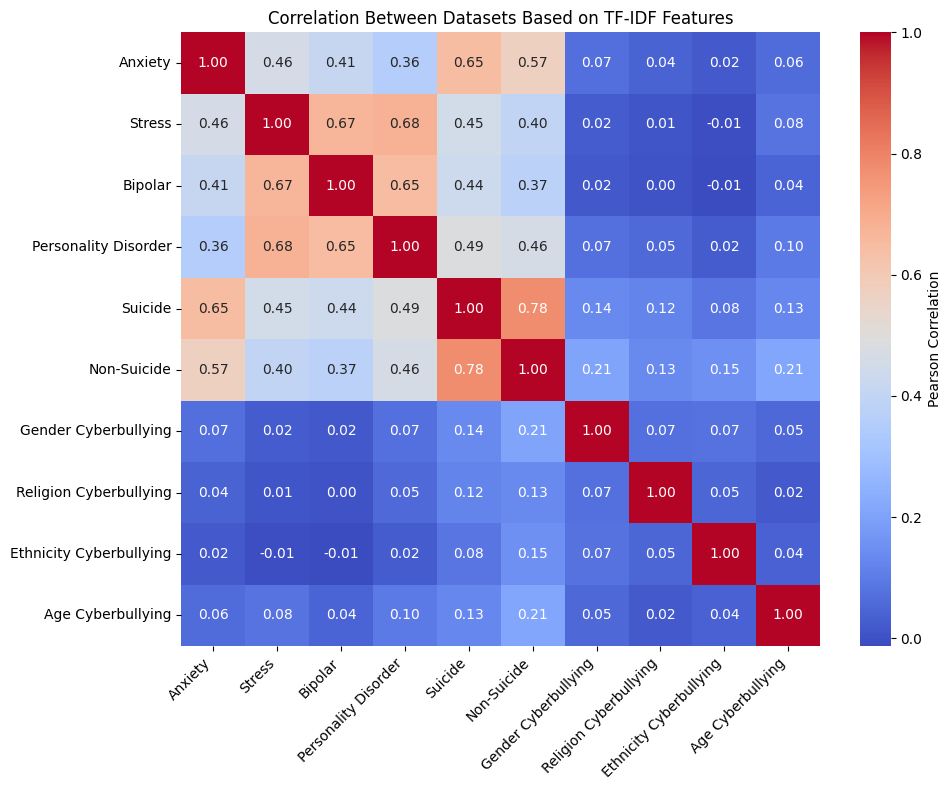

In [49]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# Combine datasets with dataset names as labels
combined_df = pd.concat([df.assign(dataset_name=name) for df, name in zip(ten_datasets, list_of_ten_datasets)])

# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, stop_words="english")  # Limit to top 1000 features
tfidf_matrix = vectorizer.fit_transform(combined_df["text"].astype(str))
feature_names = vectorizer.get_feature_names_out()

# Compute average TF-IDF per dataset
dataset_tfidf = {}
for name in list_of_ten_datasets:
    dataset_texts = combined_df[combined_df["dataset_name"] == name]["text"].dropna()
    if len(dataset_texts) > 0:
        dataset_tfidf[name] = np.mean(vectorizer.transform(dataset_texts).toarray(), axis=0)

# Create correlation matrix
n_datasets = len(dataset_tfidf)
correlation_matrix = np.zeros((n_datasets, n_datasets))
for i, name1 in enumerate(dataset_tfidf.keys()):
    for j, name2 in enumerate(dataset_tfidf.keys()):
        if i <= j:
            corr, _ = pearsonr(dataset_tfidf[name1], dataset_tfidf[name2])
            correlation_matrix[i, j] = corr
            correlation_matrix[j, i] = corr  # Symmetric

# Mapping raw dataframe names to real labels
name_map = {
    "dep_df1": "Depression",
    "non_dep_df1": "Non-Depression",
    "anxiety_df": "Anxiety",
    "stress_df": "Stress",
    "bipolar_df": "Bipolar",
    "personality_disorder_df": "Personality Disorder",
    "suicide_df1": "Suicide",
    "not_suicide_df1": "Non-Suicide",
    "cyber_gender_df": "Gender Cyberbullying",
    "cyber_religion_df": "Religion Cyberbullying",
    "cyber_ethnicity_df": "Ethnicity Cyberbullying",
    "cyber_age_df": "Age Cyberbullying",
    "cyber_other_cyberbullying_df": "Other Cyberbullying"
}

# Apply the name map to labels
mapped_labels = [name_map.get(name, name) for name in dataset_tfidf.keys()]

# Plot heatmap with human-readable names
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels=mapped_labels, yticklabels=mapped_labels,
            cbar_kws={'label': 'Pearson Correlation'})
plt.title("Correlation Between Datasets Based on TF-IDF Features")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Creating a Combined dataset for Analysis

The function below calls the random select function on all the datasets and select 3000 rows randomly from each of the datasets

In [50]:
def merge_data(datasets, num_samples=3000, seed=42):
    """
    Cleans and samples from each dataset, then merges and encodes for training.

    Parameters:
        datasets (list of pd.DataFrame): List of datasets to be cleaned and merged.
        num_samples (int): Number of rows to randomly sample per dataset.
        seed (int): Random seed for reproducibility.

    Returns:
        pd.DataFrame: Cleaned, balanced, and merged dataset with encoded status labels.
    """
    processed_dfs = []

    for i, df in enumerate(datasets):
        if df is None:
            print(f"Skipping dataset {i}: is None.")
            continue

        # Step 1: Clean text and standardize status
        df_cleaned = clean_and_modify_texts(df)

        # Step 2: Randomly select N rows
        df_sampled = random_select(df_cleaned, num_samples, seed=seed)
        # df_sampled = random_select(df, num_samples, seed=seed)

        # Append to list
        processed_dfs.append(df_sampled)

    # Step 3: Merge all datasets
    merged_df = pd.concat(processed_dfs, ignore_index=True)

    # Step 4: Encode 'status' column into numerical labels
    merged_df['encoded_status'] = merged_df['status'].astype('category').cat.codes

    # Final shuffle
    merged_df = merged_df.sample(frac=1, random_state=seed).reset_index(drop=True)

    return merged_df



In [51]:
# Merging the final 10 selected datasets
merged_df = merge_data(ten_datasets)
merged_df['status'].unique()
merged_df['status'].value_counts()
merged_df.head(10)
# len(merged_df)
# merged_df.isna().sum()

Requested 3000 rows - but only 2916 available. Returning all rows, shuffled.
Requested 3000 rows - but only 2900 available. Returning all rows, shuffled.
Requested 3000 rows - but only 2876 available. Returning all rows, shuffled.
Requested 3000 rows - but only 2999 available. Returning all rows, shuffled.


,text,status,encoded_status
0,just not very appealing to me then again it is...,gender_cb,4
1,as a woman who supports a pussygrabber for a p...,gender_cb,4
2,also just to be clear its always sunny has had...,gender_cb,4
3,u kno the reason they kinda skip overdiscredit...,ethnicity_cb,3
4,i m not sexist but y do female managers think ...,gender_cb,4
5,i keep waiting for certain landmarks in lifein...,suicide,9
6,anyone have constant vivid dreams with health ...,anxiety,1
7,no doubt that david w is an idiot but youre no...,religion_cb,7
8,tip for finding pedos since thats the popular ...,non_suicide,5
9,i get where shes coming from but only if there...,stress,8


In [52]:
# Saving the merged dataset (Cleaned and merged) for easy use

merged_df.to_csv('merged_df.csv', index = False)

## Model Traing and Evaluation

In [53]:
# !pip install torch==2.0.1 torchvision==0.15.2 --force-reinstall
import torch
from transformers import BertTokenizer, BertModel
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# Sample a subset to visualize
sample_df = merged_df.sample(n=min(1000, len(merged_df)), random_state=42).copy()
texts = sample_df["text"].astype(str).tolist()
labels = sample_df["status"]

# ------------------------
# BERT Embeddings (CLS token)
# ------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = BertModel.from_pretrained("bert-base-uncased").to(device)
bert_model.eval()

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Full TF-IDF on merged_df
vectorizer = TfidfVectorizer(max_features=1000, stop_words="english", ngram_range=(1, 2))
X_tfidf = vectorizer.fit_transform(merged_df["text"].astype(str)).toarray()


# Assuming BERT model and tokenizer are loaded
def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128).to(device)
    with torch.no_grad():
        outputs = bert_model(**inputs)
    return outputs.last_hidden_state[:, 0, :].cpu().numpy().flatten()

merged_df["bert_embedding"] = merged_df["text"].astype(str).apply(get_bert_embedding)
X_bert = np.vstack(merged_df["bert_embedding"])


y = merged_df["encoded_status"].values

X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
X_train_bert, X_test_bert, _, _ = train_test_split(X_bert, y, test_size=0.2, random_state=42)


# Storing Model results

In [ ]:
def store_model_results(name, y_true, y_pred, class_names, results_dict):
    """
    Calculates and stores model evaluation metrics.

    Correction:
    - The `labels` parameter is now used in both `classification_report` and `confusion_matrix`
      to enforce a consistent ordering based on the `class_names` passed to the function.
    - `zero_division=0` is added to prevent warnings if a class has no predictions.
    """
    # Explicitly set the label order for the report and the confusion matrix.
    report = classification_report(y_true, y_pred, output_dict=True, labels=class_names, target_names=class_names, zero_division=0)
    conf_matrix = confusion_matrix(y_true, y_pred, labels=class_names)

    results_dict[name] = {
        'accuracy': accuracy_score(y_true, y_pred),
        'macro_f1': report['macro avg']['f1-score'],
        'weighted_f1': report['weighted avg']['f1-score'],
        'precision': report['macro avg']['precision'],
        'recall': report['macro avg']['recall'],
        # This list comprehension now correctly aligns with the confusion matrix ordering.
        'class_f1': [report[c]['f1-score'] for c in class_names],
        'class_recall': [report[c]['recall'] for c in class_names],
        'class_precision': [report[c]['precision'] for c in class_names],
        'confusion': conf_matrix
    }

## TFIDF Embeddings + Logistic Regression

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
# Recompute if necessary
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegressionCV

class_names = merged_df["status"].astype("category").cat.categories.tolist()

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize results dict
model_results = {}

clf_tfidf_logreg = LogisticRegressionCV(
    Cs=[0.1, 1, 10],
    multi_class='multinomial',
    solver='saga',
    max_iter=1000,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

clf_tfidf_logreg.fit(X_train_tfidf, y_train)

# Predict
y_pred_tfidf_logreg = clf_tfidf_logreg.predict(X_test_tfidf)

### Saving the Model Results

In [ ]:
# Store results
store_model_results("TFIDF_LogReg", y_test, y_pred_tfidf_logreg, clf_tfidf_logreg.classes_, model_results)


# store_model_results("TFIDF_LogReg", y_test, y_pred_tfidf_logreg, class_names, model_results)

print("\n=== TF-IDF + Logistic Regression Classification Report ===")
print(classification_report(y_test, y_pred_tfidf_logreg, target_names=class_names))

In [ ]:
# View results
# model_results['TFIDF_LogReg']

In [ ]:
# Save the trained model for easy reuse
import joblib
joblib.dump(clf_tfidf_logreg, 'tfidf_logreg_cv_model.joblib')

In [ ]:
# FOR REUSE == TESTING
# Load the saved model
clf_tfidf_logreg = joblib.load('tfidf_logreg_cv_model.joblib')

# Use it to predict
y_pred = clf_tfidf_logreg.predict(X_test_tfidf)

print("\n=== TF-IDF + Logistic Regression Classification Report ===")
print(classification_report(y_test, y_pred_tfidf_logreg, target_names=class_names))


# SVM + TF-IDF Embeddings

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import joblib

# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],      # Regularization strengths to try
    'kernel': ['linear']
}
grid_search = GridSearchCV(
    estimator=SVC(kernel='linear'),   # REMOVE probability=True here!
    param_grid={'C': [0.01, 0.1, 1, 10]},
    scoring='f1_macro',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Train with cross-validation
grid_search.fit(X_train_tfidf, y_train)

# Best estimator
clf_tfidf_svm = grid_search.best_estimator_

# Predict on test data
y_pred_tfidf_svm = clf_tfidf_svm.predict(X_test_tfidf)

In [ ]:
# Print classification report
print("\n=== TF-IDF + SVM (with GridSearchCV) Classification Report ===")

print(classification_report(y_test, y_pred_tfidf_svm, target_names=class_names))

# Store results
store_model_results("TFIDF_SVM_GridCV", y_test, y_pred_tfidf_svm, clf_tfidf_svm.classes_, model_results)

# Save best model
joblib.dump(clf_tfidf_svm, "tfidf_svm_gridcv_model.joblib")

# BERT Embeddings + LogReg

In [ ]:
# Train
clf_bert_logreg = LogisticRegression(max_iter=1000, solver='saga', multi_class='multinomial')
clf_bert_logreg.fit(X_train_bert, y_train)

# Predict
y_pred_bert_logreg = clf_bert_logreg.predict(X_test_bert)

# Print report
print("\n=== BERT Embeddings + Logistic Regression Classification Report ===")
print(classification_report(y_test, y_pred_bert_logreg, target_names=class_names))


In [ ]:
# Store results
store_model_results("BERT_LogReg", y_test, y_pred_bert_logreg, clf_bert_logreg.classes_, model_results)

joblib.dump(y_pred_bert_logreg, 'y_pred_bert_logreg_model.joblib')

# BERT Embeddings + RNN

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset

class SimpleRNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), hidden_dim).to(x.device)
        out, _ = self.rnn(x.unsqueeze(1), h0)
        return self.fc(out[:, -1, :])

# Setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
hidden_dim = 128
output_dim = len(class_names)

rnn_model = SimpleRNN(X_train_bert.shape[1], hidden_dim, output_dim).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(rnn_model.parameters(), lr=0.001)

# DataLoader
train_data = TensorDataset(torch.FloatTensor(X_train_bert), torch.LongTensor(y_train))
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

# Train
for epoch in range(5):
    rnn_model.train()
    for x_batch, y_batch in train_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        loss = criterion(rnn_model(x_batch), y_batch)
        loss.backward()
        optimizer.step()

# Evaluate
rnn_model.eval()
with torch.no_grad():
    logits = rnn_model(torch.FloatTensor(X_test_bert).to(device))
    y_pred_bert_rnn = torch.argmax(logits, dim=1).cpu().numpy()

# Print report
print("\n=== BERT Embeddings + RNN Classification Report ===")
print(classification_report(y_test, y_pred_bert_rnn, target_names=class_names))


## Storing model results -- PyTorch Models

In [ ]:
class_names = [
    'Age CB', 'Anxiety', 'Bipolar', 'Ethnicity CB', 'Gender CB',
    'Not Suicide', 'Personality Disorder', 'Religion CB', 'Stress', 'Suicide'
]

In [ ]:
def store_model_results2(name, y_true, y_pred, class_names, results_dict):
    # Create a list of numerical labels, e.g., [0, 1, 2, ..., 9]
    numerical_labels = list(range(len(class_names)))

    # For the report, use numerical labels for matching and ordering,
    # but the string names for the final dictionary keys.
    report = classification_report(y_true, y_pred, output_dict=True,
                                   labels=numerical_labels,
                                   target_names=class_names,
                                   zero_division=0)

    # For the confusion matrix, use the correct numerical labels.
    conf_matrix = confusion_matrix(y_true, y_pred, labels=numerical_labels)

    results_dict[name] = {
        'accuracy': accuracy_score(y_true, y_pred),
        'macro_f1': report['macro avg']['f1-score'],
        'weighted_f1': report['weighted avg']['f1-score'],
        'precision': report['macro avg']['precision'],
        'recall': report['macro avg']['recall'],
        'class_f1': [report[c]['f1-score'] for c in class_names],
        'class_recall': [report[c]['recall'] for c in class_names],
        'class_precision': [report[c]['precision'] for c in class_names],
        'confusion': conf_matrix
    }

In [ ]:
# Store results
store_model_results2("BERT_RNN", y_test, y_pred_bert_rnn, class_names, model_results)

# Save the model
torch.save(rnn_model.state_dict(), "bert_rnn_model.pt")

# # FOR MODEL REUSE LATER
# # Recreate the model architecture
# rnn_model = SimpleRNN(X_train_bert.shape[1], hidden_dim, output_dim).to(device)

# # Load saved weights
# rnn_model.load_state_dict(torch.load("bert_rnn_model.pt"))
# rnn_model.eval()  # Set to evaluation mode


# BERT Embeddings + DNN



In [ ]:
class BERTFeedforward(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(BERTFeedforward, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        return self.net(x)

# Setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_dim = X_train_bert.shape[1]
hidden_dim = 256
output_dim = len(class_names)

model_ffn = BERTFeedforward(input_dim, hidden_dim, output_dim).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_ffn.parameters(), lr=0.001)

# DataLoader
train_ds = TensorDataset(torch.FloatTensor(X_train_bert), torch.LongTensor(y_train))
train_dl = DataLoader(train_ds, batch_size=64, shuffle=True)

# Train
for epoch in range(5):
    model_ffn.train()
    for xb, yb in train_dl:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        loss = criterion(model_ffn(xb), yb)
        loss.backward()
        optimizer.step()

# Eval
model_ffn.eval()
with torch.no_grad():
    logits = model_ffn(torch.FloatTensor(X_test_bert).to(device))
    y_pred_ffn = torch.argmax(logits, dim=1).cpu().numpy()

# Print report
from sklearn.metrics import classification_report
print("\n=== BERT Embeddings + Feedforward NN (DNN) Classification Report ===")
print(classification_report(y_test, y_pred_ffn, target_names=class_names))



In [ ]:
# Store results
store_model_results2("BERT_DNN", y_test, y_pred_ffn, class_names, model_results)

# Saving the model
torch.save(model_ffn.state_dict(), "bert_dnn_model.pt")

# # FOR MODEL REUSE

# # Recreate the architecture
# model_ffn = BERTFeedforward(input_dim, hidden_dim, output_dim).to(device)

# # Load weights
# model_ffn.load_state_dict(torch.load("bert_dnn_model.pt"))
# model_ffn.eval()

# Fine-tuned BERT

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

# Dataset class for HuggingFace BERT
class BERTDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        inputs = self.tokenizer(self.texts[idx], padding='max_length', truncation=True,
                                max_length=self.max_len, return_tensors="pt")
        return {
            'input_ids': inputs['input_ids'].squeeze(0),
            'attention_mask': inputs['attention_mask'].squeeze(0),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long)
        }

# Data split
texts = merged_df["text"].astype(str).tolist()
labels = merged_df["encoded_status"].values.tolist()
X_train_text, X_test_text, y_train_text, y_test_text = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(class_names)).to(device)

# Dataset + Dataloader
train_ds = BERTDataset(X_train_text, y_train_text, tokenizer)
test_ds = BERTDataset(X_test_text, y_test_text, tokenizer)
train_dl = DataLoader(train_ds, batch_size=16, shuffle=True)
test_dl = DataLoader(test_ds, batch_size=16)

# Optimizer
optimizer = AdamW(bert_model.parameters(), lr=2e-5)

# Training loop (3 epochs)
bert_model.train()
for epoch in range(6):
    for batch in train_dl:
        optimizer.zero_grad()
        outputs = bert_model(
            input_ids=batch['input_ids'].to(device),
            attention_mask=batch['attention_mask'].to(device),
            labels=batch['labels'].to(device)
        )
        loss = outputs.loss
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1} completed. Loss: {loss.item():.4f}")

# Evaluation
bert_model.eval()
preds, true = [], []
with torch.no_grad():
    for batch in test_dl:
        outputs = bert_model(
            input_ids=batch['input_ids'].to(device),
            attention_mask=batch['attention_mask'].to(device)
        )
        logits = outputs.logits
        preds.extend(logits.argmax(dim=1).cpu().numpy())
        true.extend(batch['labels'].cpu().numpy())

# Print report
from sklearn.metrics import classification_report
print("\n=== Fine-Tuned BERT Classification Report ===")
print(classification_report(true, preds, target_names=class_names))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
model_results = {}
# Store results
store_model_results2("BERT_Finetuned", true, preds, class_names, model_results)

# SAVING THE MODEL

# Save model and tokenizer
bert_model.save_pretrained("bert_finetuned_model")
tokenizer.save_pretrained("bert_finetuned_model")





In [ ]:
# # FOR MODEL REUSE

# from transformers import BertTokenizer, BertForSequenceClassification

# # Load model and tokenizer
# tokenizer = BertTokenizer.from_pretrained("bert_finetuned_model")
# finetuned_bert_model = BertForSequenceClassification.from_pretrained("bert_finetuned_model").to(device)


# # Example inference
# inputs = tokenizer("some input text", return_tensors="pt", padding=True, truncation=True, max_length=128)
# inputs = {k: v.to(device) for k, v in inputs.items()}
# outputs = bert_model(**inputs)
# predicted_class = outputs.logits.argmax(dim=1).item()

## Epoch Control (Early Stopping Implementation)

In [ ]:
# import torch
# from transformers import BertTokenizer, BertForSequenceClassification, AdamW
# from torch.utils.data import Dataset, DataLoader
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# import numpy as np

# # Dataset class for HuggingFace BERT (no changes needed)
# class BERTDataset(Dataset):
#     def __init__(self, texts, labels, tokenizer, max_len=128):
#         self.texts = texts
#         self.labels = labels
#         self.tokenizer = tokenizer
#         self.max_len = max_len

#     def __len__(self):
#         return len(self.texts)

#     def __getitem__(self, idx):
#         inputs = self.tokenizer(self.texts[idx], padding='max_length', truncation=True,
#                                 max_length=self.max_len, return_tensors="pt")
#         return {
#             'input_ids': inputs['input_ids'].squeeze(0),
#             'attention_mask': inputs['attention_mask'].squeeze(0),
#             'labels': torch.tensor(self.labels[idx], dtype=torch.long)
#         }

# # --- 1. Data Split (with a new validation set) ---
# texts = merged_df["text"].astype(str).tolist()
# labels = merged_df["encoded_status"].values.tolist()

# # First, split into training+validation and test sets
# X_train_val_text, X_test_text, y_train_val, y_test_text = train_test_split(texts, labels, test_size=0.2, random_state=42)

# # Next, split the training+validation set into training and validation sets
# X_train_text, X_val_text, y_train, y_val = train_test_split(X_train_val_text, y_train_val, test_size=0.1, random_state=42) # 10% of train data for validation


# # --- 2. Tokenizer and Model ---
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(class_names)).to(device)


# # --- 3. Dataset + DataLoader (with a new validation loader) ---
# train_ds = BERTDataset(X_train_text, y_train, tokenizer)
# val_ds = BERTDataset(X_val_text, y_val, tokenizer) # New validation dataset
# test_ds = BERTDataset(X_test_text, y_test_text, tokenizer)

# train_dl = DataLoader(train_ds, batch_size=16, shuffle=True)
# val_dl = DataLoader(val_ds, batch_size=16) # New validation dataloader
# test_dl = DataLoader(test_ds, batch_size=16)


# # --- 4. Optimizer and Early Stopping Setup ---
# optimizer = AdamW(bert_model.parameters(), lr=2e-5)

# # Early Stopping parameters
# patience = 2 # Number of epochs to wait for improvement before stopping
# patience_counter = 0
# best_val_loss = float('inf') # Initialize with a very high value
# best_model_path = 'best_model_state.bin' # Path to save the best model


# # --- 5. Modified Training Loop with Validation ---
# epochs = 6 # Set max number of epochs
# for epoch in range(epochs):
#     # Training phase
#     bert_model.train()
#     total_train_loss = 0
#     for batch in train_dl:
#         optimizer.zero_grad()
#         outputs = bert_model(
#             input_ids=batch['input_ids'].to(device),
#             attention_mask=batch['attention_mask'].to(device),
#             labels=batch['labels'].to(device)
#         )
#         loss = outputs.loss
#         total_train_loss += loss.item()
#         loss.backward()
#         optimizer.step()

#     avg_train_loss = total_train_loss / len(train_dl)

#     # Validation phase
#     bert_model.eval()
#     total_val_loss = 0
#     with torch.no_grad():
#         for batch in val_dl:
#             outputs = bert_model(
#                 input_ids=batch['input_ids'].to(device),
#                 attention_mask=batch['attention_mask'].to(device),
#                 labels=batch['labels'].to(device)
#             )
#             loss = outputs.loss
#             total_val_loss += loss.item()

#     avg_val_loss = total_val_loss / len(val_dl)
#     print(f"Epoch {epoch+1}/{epochs} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")

#     # Early Stopping Check
#     if avg_val_loss < best_val_loss:
#         best_val_loss = avg_val_loss
#         torch.save(bert_model.state_dict(), best_model_path) # Save the best model
#         patience_counter = 0 # Reset patience
#         print(f"Validation loss improved. Saving model to {best_model_path}")
#     else:
#         patience_counter += 1
#         print(f"Validation loss did not improve. Patience: {patience_counter}/{patience}")

#     if patience_counter >= patience:
#         print("Early stopping triggered.")
#         break # Exit the training loop

# # --- 6. Final Evaluation on the Test Set ---
# # Load the best model state before final evaluation
# print(f"\nLoading best model from {best_model_path} for final evaluation.")
# bert_model.load_state_dict(torch.load(best_model_path))

# bert_model.eval()
# preds, true = [], []
# with torch.no_grad():
#     for batch in test_dl:
#         outputs = bert_model(
#             input_ids=batch['input_ids'].to(device),
#             attention_mask=batch['attention_mask'].to(device)
#         )
#         logits = outputs.logits
#         preds.extend(logits.argmax(dim=1).cpu().numpy())
#         true.extend(batch['labels'].cpu().numpy())

# # Print report
# print("\n=== Fine-Tuned BERT Classification Report (Best Model) ===")
# print(classification_report(true, preds, target_names=class_names))

## Saving all the model results stats to a csv file

In [ ]:
results10v1 = pd.DataFrame(model_results)
results10v1.to_csv("results_may.csv")

# Model Comparism and Evaluation

In [ ]:
model_names = ['TFIDF_LogReg', 'TFIDF_SVM_GridCV', 'BERT_LogReg', 'BERT_RNN', 'BERT_DNN', 'BERT_Finetuned']
class_names = ['Age CB', 'Anxiety', 'Bipolar', 'Ethnic CB', 'Gender CB', 'Not Suicide','Personality Disorder', 'Religion CB', 'Stress', 'Suicide']

overall_data = []
for name in model_names:
    overall_data.append({
        'Model': name,
        'Accuracy': model_results[name]['accuracy'],
        'Macro F1': model_results[name]['macro_f1'],
        'Weighted F1': model_results[name]['weighted_f1'],
        'Precision': model_results[name]['precision'],
        'Recall': model_results[name]['recall']
    })

# Create and style the DataFrame
overall_df = pd.DataFrame(overall_data).set_index('Model')
styled_overall = overall_df.style.background_gradient(cmap='Blues').format('{:.2f}').set_caption("Overall Model Performance Comparison")
display(styled_overall)


# Extracting the per-class F1, Precision and Recall scores
class_f1_data = {name: model_results[name]['class_f1'] for name in model_names}
class_precision_data = {name: model_results[name]['precision'] for name in model_names}
class_recall_data = {name: model_results[name]['recall'] for name in model_names}


# Create and style the DataFrame
per_class_f1_df = pd.DataFrame(class_f1_data, index=class_names).T # Transpose to have models as rows
styled_per_class_f1 = per_class_f1_df.style.background_gradient(cmap='Greens').format('{:.2f}').set_caption("Per-Class F1-Score Comparison")
display(styled_per_class_f1)

per_class_precision_df = pd.DataFrame(class_precision_data, index=class_names).T # Transpose to have models as rows
styled_per_class_precision = per_class_precision_df.style.background_gradient(cmap='Greens').format('{:.2f}').set_caption("Per-Class Precision Comparison")
display(styled_per_class_precision)

per_class_recall_df = pd.DataFrame(class_recall_data, index=class_names).T # Transpose to have models as rows
styled_per_class_recall = per_class_recall_df.style.background_gradient(cmap='Greens').format('{:.2f}').set_caption("Per-Class Recall Comparison")
display(styled_per_class_recall)

## Plotting the Results - Alternative Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# model_names = ['TFIDF_LogReg', 'TFIDF_SVM', 'BERT_LogReg', 'BERT_RNN', 'BERT_DNN', 'BERT_Finetuned', 'SBERT_SOSNet']

# Define colors
colors = {
    'BERT_Finetuned': 'blue',
    'TFIDF_LogReg': 'orange',
    'TFIDF_SVM_GridCV': 'green',
    'BERT_LogReg': 'purple',
    'BERT_RNN': 'red',
    'BERT_DNN': 'pink'
}

# === PLOT 1: Macro F1 Comparison Across Models ===
plt.figure(figsize=(15, 6))
macro_f1_scores = [model_results[m]['macro_f1'] for m in model_names]

for i, model_name in enumerate(model_names):
    plt.bar(model_name, macro_f1_scores[i], color=colors[model_name], label=f"{model_name}: {macro_f1_scores[i]:.2f}")

plt.ylabel("Macro AVG F1-Score")
plt.title("Macro Average F1-Score Comparison Across Models")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Macro AVG F1", loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.grid()
plt.show()



# === PLOT 2: Accuracy Comparison ===
plt.figure(figsize=(15, 6))
accuracy_scores = [model_results[m]['accuracy'] for m in model_names]

for i, model_name in enumerate(model_names):
    plt.bar(model_name, accuracy_scores[i], color=colors[model_name], label=f"{model_name}: {accuracy_scores[i]:.2f}")

plt.ylabel("Accuracy")
plt.title("Accuracy Comparison Across Models")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Accuracy", loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.grid()
plt.show()


plt.figure(figsize=(15, 6))
x = np.arange(len(class_names)) * 1.2  # <-- Add spacing between groups
width = 0.12  # <-- Slightly reduce bar width

for i, model_name in enumerate(model_names):
    plt.bar(x + i * width, model_results[model_name]['class_f1'], width=width,
            label=model_name, color=colors[model_name])

plt.xticks(x + width * (len(model_names)-1) / 2, class_names, rotation=45, ha='right')
plt.ylabel("F1-Score")
plt.title("F1-Score Comparison Across Models and Classes")
plt.grid(axis='y')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


# === Recall plot version ===
plt.figure(figsize=(15, 6))
x = np.arange(len(class_names)) * 1.2  # Same spacing
width = 0.12

for i, model_name in enumerate(model_names):
    plt.bar(x + i * width, model_results[model_name]['recall'], width=width,
            label=model_name, color=colors[model_name])

plt.xticks(x + width * (len(model_names)-1) / 2, class_names, rotation=45, ha='right')
plt.ylabel("Recall")
plt.title("Recall Comparison Across Models and Classes")
plt.grid(axis='y')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


# === PLOT 4: Confusion Matrices for Each Model ===
for model_name in model_names:
    plt.figure(figsize=(8, 6))
    sns.heatmap(model_results[model_name]['confusion'], annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.xticks(rotation=60)
    plt.tight_layout()
    plt.show()


# Explainability - SHAP

### Using BERT-Finetuned model

Given the Finetuned BERT model is the best performing model, we used SHAP and LLAMA 3 70b using Langchain to understand the decision making for the model.

In [ ]:
!pip install langchain-groq -q
# === Initialize Groq for LLM ===
# Make sure to set your GROQ_API_KEY environment variable
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
api_key = user_secrets.get_secret("GROQ_API_KEY")

## Explainabilty - Hybrid SHAP + LLM Explainer

In [ ]:
import shap
import torch
import numpy as np
import pandas as pd
import random
from transformers import pipeline, BertTokenizer, BertForSequenceClassification
from IPython.display import display, HTML
!pip install langchain-groq -q
from langchain_groq import ChatGroq
from langchain.prompts import PromptTemplate
from langchain.schema import HumanMessage
import os

# === 1. Initialization and Setup ===

# --- Initialize SHAP for Notebook Display ---
shap.initjs()

llm = ChatGroq(
    model="llama3-70b-8192",
    temperature=0.2,
    max_tokens=1500,
    groq_api_key=api_key
)

hybrid_explanation_prompt = PromptTemplate(
    input_variables=["text", "predicted_label", "shap_words"],
    template="""
**Task:** Explain why a BERT model classified a text as '{predicted_label}'.

**Text:** "{text}"
**Key Predictive Words (from SHAP):** {shap_words}

**Instructions:**
Write a single, concise paragraph that provides a direct and analytical explanation.
- **Start directly** with the justification (e.g., "The model's classification is justified by...").
- **Integrate** the 'Key Predictive Words' into your analysis, explaining how they function within the context of the full text.
- **Focus** on the combination of explicit language and emotional tone.
- **Do not** use phrases like "The BERT model classified..." or "The Key Words identified...".
- **Maintain** a neutral, academic tone. Avoid clinical diagnoses.
"""
)

# --- HYBRID FUNCTION: Generates Explanation from Text + SHAP ---
def get_hybrid_llm_explanation(text, predicted_label, shap_value, top_n=7):
    """
    Generates a context-aware LLM explanation by combining the original text
    with the most influential words from a SHAP analysis.
    """
    try:
        class_index = model.config.label2id[predicted_label]
        class_shap_values = shap_value[:, class_index]

        words = class_shap_values.data
        values = class_shap_values.values

        top_indices = np.argsort(values)[-top_n:]
        top_words = [words[i] for i in top_indices if values[i] > 0]

        if not top_words:
            return "No significant positive words were found by SHAP to explain this prediction."

        shap_words_str = ", ".join(reversed(top_words))

        prompt = hybrid_explanation_prompt.format(
            text=text,
            predicted_label=predicted_label,
            shap_words=shap_words_str
        )

        response = llm.invoke([HumanMessage(content=prompt)])
        return response.content.strip()

    except Exception as e:
        return f"Error generating hybrid LLM explanation: {str(e)}"

# --- Function to display formatted explanation ---
def display_llm_explanation(explanation):
    """Displays the LLM explanation with nice formatting."""
    html_content = f"""
    <div style="border: 2px solid #4CAF50; border-radius: 10px; padding: 15px; margin: 10px 0; background-color: #f9f9f9;">
        <h3 style="color: #4CAF50; margin-top: 0;">🤖 LLM Explainability Analysis</h3>
        <div style="line-height: 1.6; white-space: pre-wrap; font-family: Arial, sans-serif;">
{explanation}
        </div>
    </div>
    """
    display(HTML(html_content))

# === 2. Data and Model Loading ===
label_map = {
    "suicide": "Suicidal", "non_suicide": "Non-suicidal", "anxiety": "Anxiety",
    "bipolar": "Bipolar Disorder", "stress": "Stress", "personality_disorder": "Personality Disorder",
    "religion_cb": "Religious CB", "gender_cb": "Gender-based CB",
    "ethnicity_cb": "Ethnicity-based CB", "age_cb": "Age-based CB"
}

try:
    df_for_explain = merged_df.copy()
    model = bert_model
except NameError:
    print("WARNING: 'merged_df' and 'bert_model' not found. Creating dummy data and model for demonstration.")
    dummy_data = {
        'text': [
            "essay about living with a mental illness deborah danner was killed by police in new york city she was a woman living with schizophrenia she was intell...",
            "i can't take it anymore, i just want to end it all. goodbye.",
            "the stress from my boss is unbearable."
        ],
        'status': ['bipolar', 'suicide', 'stress'] # Note: 'bipolar' label is for demonstration
    }
    merged_df = pd.DataFrame(dummy_data)
    df_for_explain = merged_df.copy()
    model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=len(label_map))

df_for_explain["pretty_label"] = df_for_explain["status"].map(label_map)
class_names = sorted(df_for_explain["status"].unique().tolist())
id2label = {i: label_map.get(label, label) for i, label in enumerate(class_names)}
label2id = {v: k for k, v in id2label.items()}

device = 0 if torch.cuda.is_available() else -1
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model.eval()
model.config.id2label = id2label
model.config.label2id = label2id

pipe = pipeline(
    "text-classification", model=model, tokenizer=tokenizer, top_k=None, device=device
)
explainer = shap.Explainer(pipe)

# === 3. Main Execution Loop ===
num_samples = 5
sampled_df = df_for_explain.sample(min(num_samples, len(df_for_explain)), random_state=42).reset_index(drop=True)
texts = sampled_df["text"].tolist()
true_labels = sampled_df["pretty_label"].tolist()
predictions = pipe(texts)

print("=" * 80)
print("HYBRID EXPLAINABILITY ANALYSIS (TEXT + SHAP-GUIDED)")
print("=" * 80)

for i, text in enumerate(texts):
    pred_probs = predictions[i]
    top_pred = max(pred_probs, key=lambda x: x["score"])
    predicted_label = top_pred["label"]
    confidence = top_pred["score"]

    print(f"\n📄 **TEXT {i+1}**: \"{text[:150]}{'...' if len(text) > 150 else ''}\"")
    print(f"🎯 Actual Label: {true_labels[i]}")
    print(f"🤖 Predicted: {predicted_label}  |  Confidence: {confidence:.3f}")
    print("-" * 60)

    print("🔍 SHAP Token-level Explanation:")
    shap_value_list = explainer([text])
    shap_value = shap_value_list[0]

    shap_html = shap.plots.text(shap_value, display=False)
    display(HTML(shap_html))

    print("\n🧠 Getting Hybrid LLM Explanation (from Text + SHAP data)...")
    # --- CALLS THE NEW HYBRID FUNCTION ---
    llm_explanation = get_hybrid_llm_explanation(
        text=text,
        predicted_label=predicted_label,
        shap_value=shap_value
    )
    display_llm_explanation(llm_explanation)

    print("\n" + "="*80)